# Welcome to the AMID analysis Notebook! {-}

The next few blocks, each with very little code, allows easy analysis of AMID data (from Dal and Novonix UHPC files only, for now) with some flexibility for naming files and creating directories without the need to copy the original datafile anywhere.

The text preceeding each cell gives some information on the arguments that can be supplied to the function calls.

Reminder: to run a block press "shift+enter". All blocks with text, like this one, can be run or skipped over.

In [1]:
from amid import AMID
import warnings
warnings.filterwarnings(action='ignore')

### Directory structure {-}

*dstpath*: the location on your computer that will serve as the base directory to save things. On Windows, if it does not start with "C:" then the directory where this notebook is located is used as base.

*srcpath*: the location on your computer (or remote server if connected via VPN) where the UHPC AMID file is located.

*uhpc_file*: the name of the AMID UHPC file. Be sure to include the .csv file extension.

*cell_label*: an identifier for your analysis. If a directory \[dstpath\]\\\[cell_label\] does not exist, one is created. *cell_label* is also used when saving figures and in legends. This allows users to perform different analyses on the same AMID UHPC file without having to make new directories or copy the datafile anywhere. No matter which operating system (Win, Mac, Linux), use the "/" for separating directories - differences between operating systems are handled internally.


In [2]:
dstpath = "/home/mcormier/projects/diffusion/analysis/amid-dev-2021/Li-rich_Ni50Mn50/"
srcpath = "/home/mcormier/projects/diffusion/analysis/amid-dev-2021/Li-rich_Ni50Mn50/"
uhpc_file = 'NTP.210320.164.csv'
cell_label = 'NTP164_for-thesis'

### The AMID object {-}

Instantiating the AMID object is easy! The resulting variable (in this case *amid_data*) contains parsed data from the AMID protocol. You should read the output to be sure it is giving the information you expect!

In [3]:
amid_data = AMID(dstpath, srcpath, uhpc_file, cell_label, export_data=True, use_input_cap=True)

Working on cell: NTP.210320.164
Positive electrode active mass: 0.0011172 g
Input cell capacity: 0.00022344 Ah
Indices being removed to time non-monotonicity: [3528 3576]
First signature curve step: 4
Last signature curve step: 164
Specific Capacity achieved in advanced protocol: 167.18 mAh/g
Using 0.00022344 Ah to compute rates.
Starting voltage: 4.390 V
Ending voltage: 3.000
Found 81 charge or discharge steps in sig curve sequences.
Found 9 signature curves.
Cutoff voltages: [4.3 4.2 4.1 4.  3.9 3.8 3.7 3.6 3. ]
Midpoint voltages: [4.345 4.25  4.15  4.05  3.95  3.85  3.75  3.65  3.3  ]
Voltage intervals widths: [0.09 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.6 ]
Voltage interval labels: ['4.39 V - 4.30 V', '4.30 V - 4.20 V', '4.20 V - 4.10 V', '4.10 V - 4.00 V', '4.00 V - 3.90 V', '3.90 V - 3.80 V', '3.80 V - 3.70 V', '3.70 V - 3.60 V', '3.60 V - 3.00 V']
Found 9 voltage intervals.
Done parsing signature curves.


### Make some plots! {-}

You can now make the standard plots. For each plotting method, figures are saved by default. If you would prefer to not have them saved automatically, you can pass *save=False*. e.g. amid_data.plot_protocol(save=False). All figures get saved in the directory \[*dstpath*\]\\\[*cell_label*\].

NOTE: in this particular example, there is an OCV step after the discharge step preceeding the signature curves.

*ylims*: an optional argument to fix y-axis plot bounds. A list with the min and max values for the y-axis bounds. e.g., ylims=[2.95, 4.35].

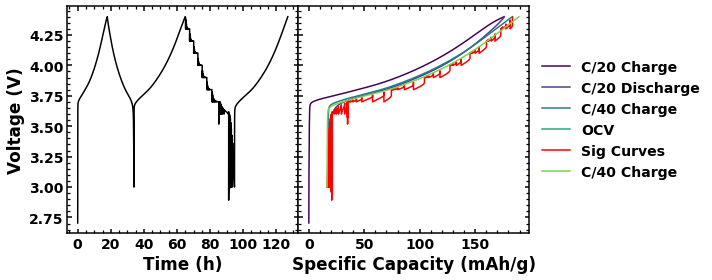

In [5]:
amid_data.plot_protocol()

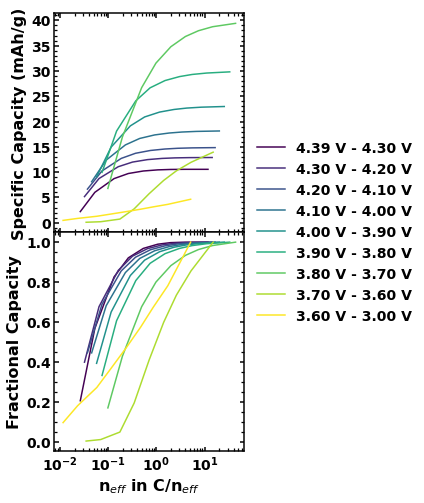

In [7]:
amid_data.plot_caps()

### It's time to fit the data! {-}
You must pass the *PARTICLE RADIUS IN CM* to the *fit_atlung()* method. In this example, $r=0.5\ \mu$m is passed. 

Optional arguments:

*ftol*: the tolerance criteria for the fits. If fits are poor, try making smaller. If a RuntimeWarning is raised, try making larger. You may still get a good fit despite a RuntimeWarning being raised. Defaults to 5e-14.

*D_bounds*: bounds for $D_c$. Needs to be a list with the lower and upper bound.

*shape*: particle geometry. Currently supports "sphere" and "plane". Defaults to "sphere".

*nalpha*: the number of expansion coefficients to use in the Atlung expression. Default to 150.

*nQ* : the number of Q values (on a log scale) to use in the theorical Atlung curve, $\tau$ vs $Q$, for comparing fit quality. Default is 2000. There is normally no reason to change this.

*save*: whether or not to save figures comparing theory to fitted values for each voltage interval. Default is True.

*label*: an additional label that be used for saving figures and data. For example, perhaps one wishes to use different particle sizes, then "label=r1" and "label=r2" could be used in 2 separate calls to fit_atlung() and each set of plots would be saved to same directory but each with their corresponding label.

Returns: data needed to make summary graph.

In [8]:
fit_data = amid_data.fit_atlung(0.5e-4, nalpha=150, ftol=5e-14, save=True, D_bounds=[1e-15, 1e-10], label='r-0.5um')

Fitted Dc: [1.05075312e-12 1.73210799e-12 1.77481376e-12 1.44528634e-12
 9.67377364e-13 6.02194447e-13 2.24321894e-13 3.68019404e-14
 7.86546006e-13]
Standard deviations from fit: [1.75822128e-11 2.99626161e-12 1.59816960e-12 1.53100588e-12
 2.33453400e-12 3.45329854e-12 8.72879280e-12 4.26097946e-11
 1.69027791e-11]
Atlung fit error: [0.04907658 0.01265312 0.0051202  0.00694017 0.00775909 0.0130172
 0.02459828 0.0593862  0.15808349]


### Make the summary graph! {-}

Need to pass the returned values from fit_atlung() to this method as the first argument.

Optional arguments: 

*label*: An additional label to saving the figure in case multiple of these are to be generated. Is passed, the same label as when calling fit_atlung() should be used. Default is None.

*save*: whether or not to save the figure. Default is True

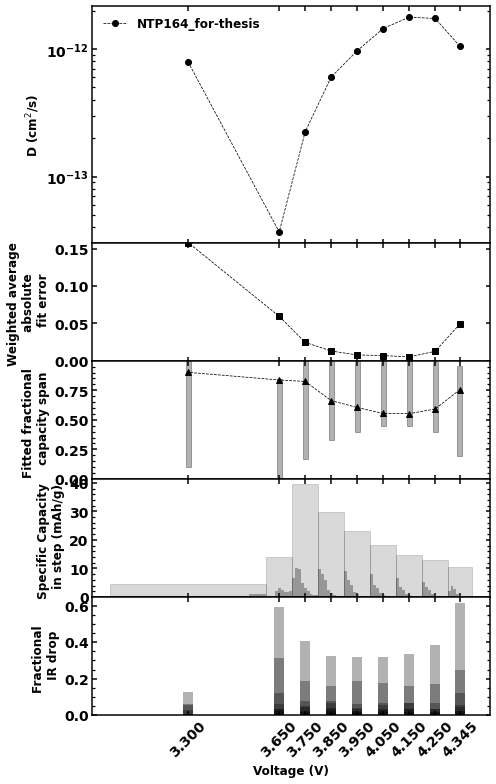

In [10]:
amid_data.make_summary_graph(fit_data, label='r-0.5um')